앞장에서 배운 퍼셉트론은 복잡한 함수를 표현할 수 있다는 장점이 있지만 가중치를 설정하는 작업을 사람이 수동으로 해야했다.<br>
신경망은 이러한 단점을 해결해준다. 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질이다. <br>
이번 장에서는 신경망의 개요를 살펴보고 신경망이 입력 데이터가 무엇인지 식별하는 처리 과정을 알아보자.

## <strong> 2.1 퍼셉트론에서 신경망으로 </strong>

신경망은 퍼셉트론과 공통점이 많다. 하지만 이번 절에서는 퍼셉트론과 다른 점을 중심으로 신경망의 구조를 살펴보자.

<h3> <strong> 1. 신경망의 예 </strong> </h3>

신경망을 그림으로 나타내면 아래와 같다. 이때 가장 왼쪽 줄을 **입력층**, 가장 오른쪽 줄을 **출력층**, 중간 줄은 **은닉층**이라고 한다.<br>
은닉층의 뉴런은 (입력층과 출력층과 달리) 사람 눈에는 보이지 않는다.

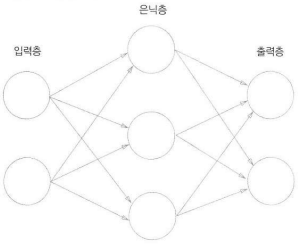
<br>
[참고] 위 그림의 신경망은 3층으로 구성되지만 가중치를 갖는 층은 2개뿐이므로 **'2층 신경망'**이라고 부른다. 문헌에 따라 신경망을 구성하는 층수를 기준으로 **'3층 신경망'**이라고 하는 경우도 있다.

앞장에서 본 퍼셉트론과 특별히 달라보이진 않는다. 실제로 뉴런이 연결되는 방식은 앞 장의 퍼셉트론에서 달라진 것이 없다.

<h3> <strong> 2. 퍼셉트론 복습 </strong> </h3>

이전에 배운 퍼셉트론의 구조는 $x_1$과 $x_2$ 두 신호를 입력받아 $y$를 출력했다. <br> 
해당 퍼셉트론을 수식으로 타나태면 아래의 식이 된다.

$
\begin{cases}
0 \, (b+w_1x_2+w_2x_2 \leq 0)\\
1 \, (b+w_1x_2+w_2x_2 > 0\\
\end{cases}
$

이때 b는 **편향**을 나타내는 매개변수로, 뉴런이 얼마나 쉽게 활성화 되는지를 제어한다. <br>
$w_1, w_2$는 각 신호의 **가중치**를 나타내는 매개변수로, 각 신호의 영향력을 제어한다. <br>

이 식을 더 간결한 형태로 재작성해보자. <br> 이를 위해 조건 분기의 동작(0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력)을 하나의 함수로 나타내자. <br> 이 함수를 $h(x)$라 하면 다음과 같이 표현할 수 있다.

$
y = h(b+w_1x_1+w_2x_2) \\
h(x) = \begin{cases}
0 \, (x \leq 0) \\
1 \, (x > 0)
\end{cases}
$ 

첫 번째 식은 입력 신호의 총합이 $h(x)$라는 함수를 거쳐 변환되어, 그 변환된 값이 y의 출력이 됨을 보여준다. <br>
두 번째 식은 $h(x)$ 함수는 입력이 0을 넘으면 1을 돌려주고 그렇지 않으면 0을 돌려준다.

<h3> <strong> 3. 활성화 함수의 등장 </strong> </h3>

조금 전 $h(x)$라는 함수처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 **활성화 함수(activation function)**라 한다. <br>
이때 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다.

이전 식을 다시 살펴보자. 첫 번째 식은 **가중치가 곱해진 입력 신호의 총합을 활성화 함수에 입력해 결과를 내는 2단계로 처리된다.** <br>
그래서 이 식은 다음과 같은 2개의 식으로 나눌 수 있다.

$
a = b+w_1x_1+w_2x_2 \\
y = h(a)
$

**가중치가 달린 입력 신호와 편향의 총합을 계산하고 이를 $a$라고 한다. <br> 그리고 $a$를 함수 $h()$에 넣어 $y$를 출력한다.** 이러한 뉴런은 큰 원으로 그려보면 아래 그림처럼 나타낼 수 있다.

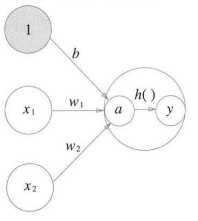

즉, 가중치의 신호를 조합한 결과가 $a$라는 노드가 되고, 활성화 함수를 통과해 $y$라는 노드로 변환된다.

## <strong> 2.2 활성화 함수 </strong>

이전의 활성화 함수는 **임계값을 경계로 출력이 바뀌었다.** 이런 함수를 **계단 함수(step function)**이라고 한다. <br> 
그래서 **'퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다'**라고 할 수 있다. <br> 
즉, 활성화 함수로 쓸 수 있는 여러 후보 중에서 퍼셉트론은 계단 함수를 채용하고 있다. <br>
그렇다면 계단 함수 이외에는 어떤 함수가 있을까?

<h3> <strong> 1. 시그모이드 함수 </strong> </h3>

시그모이드 함수(sigmoid)는 다음과 같은 식을 만족한다.

$h(x) = \frac{1}{1+exp(-x)}$

**신경망에서는 활성화 함수로 시그모이드 함수를 이용해 신호를 변환하고 변환된 신호를 다음 뉴런에 전달한다.** <br>
앞 장에서 본 퍼셉트론과 앞으로 볼 신경망의 주된 차이는 이 활성화 함수뿐이다. <br>
그 외에 뉴런이 여러 층으로 이어지는 구조와 신호를 전달하는 방법은 기본적으로 퍼셉트론과 같다.

<h3> <strong> 2. 계단 함수 구현 </strong> </h3>

계단 함수는 **임계값을 경계로 출력이 바뀌는 함수**로 이전에 입력이 0을 넘으면 1을 출력하고 그 외에는 0을 출력하는 함수가 이에 해당한다. <br>
계단 함수는 다음과 같이 구현할 수 있다.

In [ ]:
def step_function(x):
  if x > 0: return 1
  else: return 0

이 구현은 단순하고 쉽지만 인수 x는 실수만 받아들인다. <br>
즉, step_function(3.0)은 되지만 넘파이 배열을 인수로 넣을 수는 없다. <br>
**넘파이 배열도 지원하기 위해 수정하려면 다음과 같이 구현할 수 있다.**

In [ ]:
import numpy as np

def step_function(x):
  y = x>0
  return y.astype(np.int)

위처럼 **넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행해 bool 배열이 생성된다.** <br>
이 예시에서는 배열 x의 원소 각각이 0보다 크면 True, 아니면 False로 변환된다.

In [ ]:
x = np.array([-1.0, 1., 2.])
y = x>0
print(y)

[False  True  True]


또한 **넘파이 배열의 자료형을 변환**할 때는 위처럼 **astype() 메서드**를 사용하면된다.

In [ ]:
y = y.astype(np.int)
print(y)

[0 1 1]


<h3> <strong> 3. 계단 함수의 그래프 </strong> </h3>

이제 앞에서 정의한 계단 함수를 그래프로 그려보자.

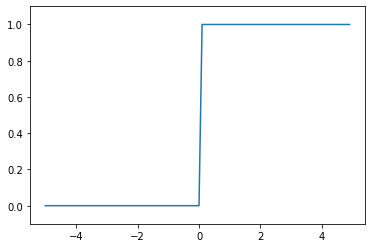

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)   # -5.0에서 5.0까지 0.1 간격의 넘파이 배열
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)             # y축 범위 지정
plt.show()

**np.arange(-5.0, 5.0, 0.1)**은 -5.0에서 5.0까지 0.1 간격의 넘파이 배열을 생성한다. <br>
그래프에서 보듯 계단 함수는 0을 경계로 출력이 0에서 1로 바뀐다. <br>
이처럼 값이 바뀌는 형태가 계단처럼 생겨 계단 함수로 불린다.

<h3> <strong> 4. 시그모이드 함수 구현 </strong> </h3>

아래는 시그모이드 함수를 구현한 코드다.

In [ ]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

np.exp() 메서드는 지수함수의 결과값을 출력해준다. <br>
위 코드는 x가 넘파이 배열이라도 올바른 결과가 출력된다.

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

**이 함수가 넘파이 배열도 처리해줄 수 있는 이유는 넘파이의 브로드캐스트에 있다.** <br>
브로드캐스트란 넘파이 배열과 스칼라 값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는  것이다. <br>
아래 코드는 브로드캐스트의 예시이다.

In [ ]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0/t)

[2. 3. 4.]
[1.         0.5        0.33333333]


이번에는 시그모이드 함수를 그래프로 그려보자.

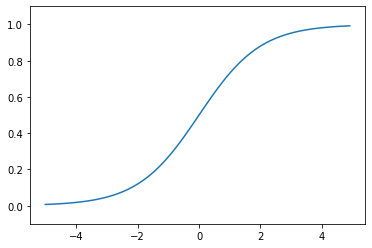

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

<h3> <strong> 5. 시그모이드 함수와 게단 함수 비교 </strong> </h3>

시그모이드 함수와 계단 함수를 비교해보자. 

**시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변한다.하지만 계단 함수는 0을 경계로 출력이 갑자기 바뀐다.** <br>
시그모이드 함수의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 된다. <br>

**계단 함수가 0과 1중 하나의 값만 돌려주는 반면 시그모이드 함수는 실수를 돌려준다는 점도 다르다.** <br>
다시 말해 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐른다.

하지만 **두 함수 모두 입력이 작을 때는 출력이 0에 가깝고 입력이 커지면 출력이 1에 가까워지는 구조인 것은 동일하다.**

<h3> <strong> 6. 비선형 함수 </strong> </h3>

시그모이드 함수는 곡선, 계단 함수는 계단처럼 구부러진 직선으로 나타나며, 동시에 **비선형 함수**로 분류된다.

[참고] 활성화 함수를 설명할 때는 비선형 함수와 선형 함수라는 용어가 자주 등장한다. <br>
함수란 어떤 값을 입력하면 그에 따른 값을 돌려주는 '변환기'이다. <br> 이 변환기에 무언가 입력했을 때 **출력이 입력의 상수배만큼 변하는 함수를 선형 함수라고 한다.** <br>
수식으로는 $f(x)=ax+b$이고, 이때 a와 b는 상수다. 그래서 성형 함수는 1개의 직선이 된다. <br>
하지만 **비선형 함수**는 문자 그대로 '선형이 아닌'함수다. 즉, 직선 1개로는 그릴 수 없는 함수를 말한다.

**신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.** 즉, 선형 함수를 사용하면 안된다. <br>
왜냐하면 **선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다.**

선형 함수는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다. <br>
예를 들어, $h(x)=cx$를 활성화 함수로 사용한 3층 네트워크를 생각해보자. <br>
이를 식으로 나타내면 $y(x) = h(h(h(x)))$가 된다. <br> 이 계산은 $y(x) = c \times c \times c \times x$처럼 곱셈을 세 번 수행하지만, 사실 $y(x) = ax$와 같은 식이다. <br>
즉, $a=c^3$라고만 하면 끝이다. 따라서 은닉층이 없는 네트워크로 표현할 수 있다.
<br> 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없으므로 반드시 비선형 함수를 사용해야 한다.

<h3> <strong> ReLU 함수 </strong> </h3>

시그모이드 함수는 신경망 분야에서 오래전부터 이용했으나, 최근에는 **ReLU(Rectified Linear Unit) 함수**를 주로 이용한다. <br>
ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수다.

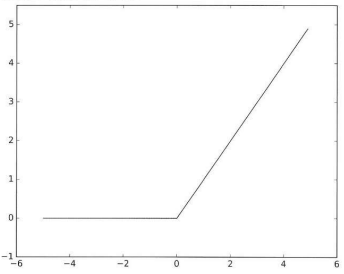

수식으로는 다음과 같이 쓸 수 있다.

$
h(x) =
\begin{cases}
x \, (x>0) \\
0 \, (x \leq 0)
\end{cases}
$

ReLU 함수는 다음과 같이 구현할 수 있다.

In [ ]:
def relu(x):
  return np.maximum(0, x)

## <strong> 2.3 다차원 배열의 계산 </strong>

넘파이의 다차원 배열을 사용한 계산법을 숙달하면 신경망을 효율적으로 구현할 수 있다. <br>
이번 절에서는 넘파이의 다차원 배열 계산에 대해 알아본 뒤 신경망을 구현해보자.

<h3> <strong> 1. 다차원 배열 </strong> </h3>

다차원 배열은 '숫자의 집합'이다. **숫자가 한 줄로 늘어선 것이나 직사각형으로 늘어놓은 것,** <br> **3차원으로 늘어놓은 것이나 N차원으로 나열하는 것을 통틀어 다차원 배열이라고 한다.** <br>
넘파이를 사용해 다차원 배열을 작성해보자. 아래는 지금까지 본 1차원 배열이다.

In [ ]:
import numpy as nm
a = np.array([1, 2, 3, 4])
print(a)
print(np.ndim(a)) # 차원 수 확인
print(a.shape)    # 배열의 모양 확인
print(a.shape[0])

[1 2 3 4]
1
(4,)
4


위와 같이 배열의 차원 수는 **np.ndim() 함수**로 확인할 수 있다. <br>
또 배열의 형상은 **인스턴스 변수 shape**로 확인할 수 있다. 이번에는 2차원 배열을 살펴보자.

In [ ]:
b = np.array([[1, 2], [3, 4],  [5, 6]])
print(b)
print(np.ndim(b))
print(b.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


위와 같은 2차원 배열은 **행렬(matrix)**이라고 부르며 배열의 가로 방향을 **행(row), 세로 방향을 열(column)**이라고 부른다.

<h3> <strong> 2. 행렬의 곱 </strong> <h3>

**행렬 곱은 왼쪽 행렬의 행과 오른쪽 행렬의 열을 원소별로 곱하고 그 값들을 더해서 계산한다.** <br>
그리고 그 결과가 새로운 다차원 배열의 원소가 된다. 이 계산을 파이썬으로 구현하면 다음과 같다.

In [ ]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
print(np.dot(A, B))

[[19 22]
 [43 50]]


행렬 곱은 위와 같이 **np.dot()**으로 계산할 수 있다. <br>
np.dot()은 입력이 1차원 배열이면 벡터, 2차원 배열이면 행렬 곱을 계산한다. <br>
단, **피연산자의 순서가 다르면 결과도 다르다.** <br>
이번에는 행과 열이 서로 다른 두 행렬의 곱을 살펴보자.

In [ ]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
print(np.dot(A, B))

[[22 28]
 [49 64]]


위 처럼 행렬의 곱을 수행할 때 **좌측 행렬의 열 수와 우측 행렬의 행 수는 같아야 한다.** <br>
만약 해당 값들이 서로 다르다면 에러가 발생한다. <br>

A가 2차원이고 B가 1차원 배열일 때도 **'대응하는 차원의 원소 수를 일치시켜라'**라는 원칙이 동일하게 적용된다.

In [ ]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([7, 8])
print(np.dot(A, B))

[23 53 83]


<h3> <strong> 3. 신경망에서의 행렬 곱 </strong> </h3>

이번에는 넘파이 행렬을 사용해 신경망을 구현해보자. <br>
이 신경망은 편향과 활성화 함수를 생략하고 가중치만 가진다.


In [ ]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
print(np.dot(X, W))

[ 5 11 17]


## <strong> 2.4 3층 신경망 구현하기 </strong>

이번에는 3층 신경망에서 수행되는 입력부터 출력까지의 처리를 구현해보자. <br>
이를 위해 앞에서 설명한 넘파이의 다차원 배열을 사용할 것이다. <br>
넘파이 배열을 잘 쓰면 적은 코드만으로 신경망의 순방향 처리를 완성할 수 있다.

<h3> <strong> 1. 표기법 설명 </strong> </h3>

이번 절에서는 신경망에서의 처리와 $w_{12}^{(1)}, a_{1}^{(1)}$ 같은 표기법을 알아보자. <br>
아래 그림을 살펴보자. 입력층 뉴런 $x_2$에서 다음 층 뉴런 $a_1^{(1)}$로 향하는 선 위에 가중치를 표시하고 있다.

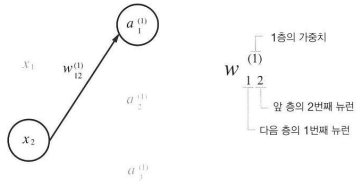

<h3> <strong> 2. 각 층의 신호 전달 구현 </strong> </h3>

이번 절에서는 '1층의 첫 번째 뉴런'으로 가는 신호를 살펴보자. <br>

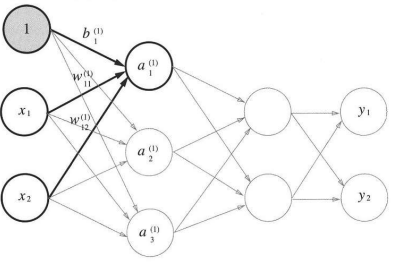

지금까지 확인할 것을 반영해 $a_{1}^{(1)}$을 수식으로 나타내보자. <br>
**$a_{1}^{(1)}$은 가중치를 곱한 신호 두 개와 편향을 합해서 다음과 같이 계산한다.**

$a_{1}^{(1)}=w_{11}^{(1)}x_1+w_{12}^{(2)}x_2+b_1^{(1)}$

이때 행렬 $A^{(1)}, X, B^{(1)}, W^{(1)}$은 각각 다음과 같다.

$A^{(1)} = (a_1^{(1)} \, a_2^{(1)} \, a_3^{(1)}), X = (x_1 \, x_2), B = (b_1^{(1)} \, b_2^{(1)} \, b_3^{(1)})$ 

$W^{(1)} = 
\begin{pmatrix}
w_{11}^{(1)} \, w_{21}^{(1)}\, w_{31}^{(1)} \\
w_{12}^{(1)} \, w_{22}^{(1)}\, w_{32}^{(1)}
\end{pmatrix}
$

아래는 다차원 배열을 이용해 위 식을 구현한 것이다.

In [ ]:
import numpy as np
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1)+B1

이어서 1층의 활성화 함수에서의 처리를 살펴보자. <br>
이 활성화 함수의 처리를 그림으로 나타내면 아래와 같다.

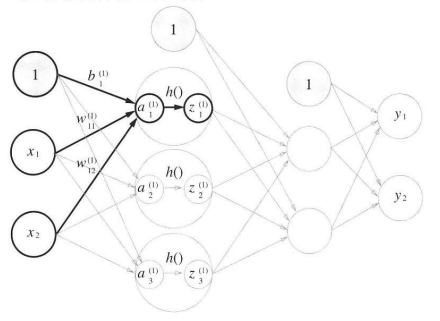

위와 같이 은닉층에서의 가중치 합을 a로 표기하고 활성화 함수 h()로 변환된 신호를 z로 표기했다. <br> 여기서는 활성화 함수로 시그모이드 함수를 사용하기로 하자. 

In [ ]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


이어서 1층에서 2층으로 가는 과정을 구현해보자.

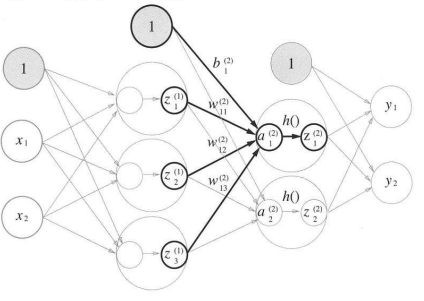

In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2 + B2)
Z2 = sigmoid(A2)

1층의 출력 Z1이 2층의 입력이 된다는 점을 제외하면 이전의 구현과 동일하다. <br>
이처럼 넘파이 배열을 사용하면서 층 사이의 신호 전달을 쉽게 구현할 수 있다.

마지막으로 2층에서 출력층으로의 신호 전달을 구현해보자. <br>
출력층의 구현도 그동안의 구현과 거의 동일하다.

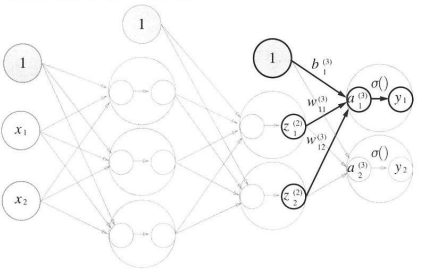

In [ ]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.32575358 0.71642543]


출력 함수의 **활성화 함수는 항등 함수인 identity_function()을 사용했다.** <br>



<h3> <strong> 3. 구현 정리 </strong> </h3>

지금까지의 구현을 정리해보자. <br> 
신경망 구현의 관례에 따라 가중치만 W1과 같이 대문자로 쓰고, 그 외 편향과 중간 결과 등은 모두 소문자를 사용했다.

In [ ]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


init_network() 함수는 **가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장한다.** <br>
이 딕서너리 변수 network에는 각 층에 필요한 매개변수를 저장한다. <br>
그리고 forward() 함수는 입력 신호를 출력으로 변환하는 처리 과정을 모두 구현하고 있다.

함수 이름을 forward라고 한 것은 **신호가 순방향(입력에서 출력 방향)으로 전달됨(순전파)을 알리기 위함이다.** <br>
이후 신경망 학습을 다룰 때 역방향(backward) 처리에 대해서도 살펴볼 것이다.


## <strong> 2.5 출력층 설계하기 </strong>



신경망은 분류와 회귀 모두에 이용할 수 있다. 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다. <br>
일반적으로 **회귀에는 항등 함수, 분류에는 소프트 맥스 함수를 사용한다.**

[참고] 기계학습 문제는 **분류(classification)**와 **회귀(regression)**로 나뉜다. 분류는 데이터가 어느 클래스(class)에 속하느냐는 문제이다. 회귀는 입력 데이터에서 수치를 예측하는 문제이다.

<h3> <strong> 1. 항등 함수와 소프트맥스 함수 구현 </strong> </h3>

**항등 함수(identity function)는 입력을 그대로 출력한다.** <br>
항등 함수의 처리는 신경망 그림으로 아래와 같다.

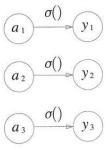

분류에서 사용하는 **소프트맥스 함수(softmax function)**의 식은 다음과 같다.

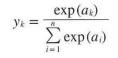

exp(x)는 $e^x$를 뜻하는 지수 함수(exponential function)이다. $n$은 출력층의 뉴런 수, $y_k$는 그중 k번째 출력을 의미한다. <br>
이 소프트맥스 함수를 그림으로 나타내면 아래와 같다.

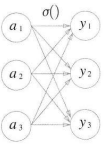

아래는 소프트맥스 함수를 구현한 코드이다.

In [ ]:
import numpy as np
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print('exp_a:', exp_a)
sum_exp_a = np.sum(exp_a)
print('sum_exp_a:', sum_exp_a)
y = exp_a / sum_exp_a
print(y)

exp_a: [ 1.34985881 18.17414537 54.59815003]
sum_exp_a: 74.1221542101633
[0.01821127 0.24519181 0.73659691]


이후 위 방식으로 사용할 수 있도록 함수로 구현해보자.

In [ ]:
def softmax(x):
  exp_a = np.exp(x)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

<h3> <strong> 2. 소프트맥스 함수 구현 시 주의점 </strong> </h3>

앞 절에서 구현한 softmax() 함수의 코드는 식을 제대로 표현하고 있지만, **컴퓨터로 계산할 때는 결함이 있다.** <br>
바로 **오버플로 문제**이다. 스프트맥스 함수는 지수 함수를 사용하는데, 지수 함수란 것은 큰 값을 빈번히 출력한다. <br>
그리고 이런 큰 값끼리 나눗셈을 하면 결과 수치가 '불안정'해진다.

이 문제를 해결하도록 소프트맥스 함수 구현을 개선해보자. 아래는 개선한 수식이다.

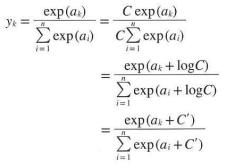

위 식이 말하고자 하는 것은 **소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더해도 (혹은 빼도) 결과는 바뀌지 않는다는 것이다.** <br>
여기서 $C'$에 어떤 값을 대입해도 상관없지만 **입력 신호 중 최대값을 이용하는 것이 일반적이다.** <br>
아래 코드를 통해 예시를 살펴보자.

In [ ]:
a = np.array([1010, 1000, 909])
print('previous solution:', np.exp(a) / np.sum(np.exp(a)))
c = np.max(a)
print('solution:', np.exp(a-c) / np.sum(np.exp(a-c)))

previous solution: [nan nan nan]
solution: [9.99954602e-01 4.53978687e-05 1.36847734e-44]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


위처럼 아무런 조치없이 소프트맥스 함수를 계산하면 nan이 출력된다. <br>
하지만 입력 신호 중 최대값을 빼주면 올바르게 계산할 수 있다. <br>
이를 바탕으로 softmax() 함수를 개선해보자.

In [ ]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a/sum_exp_a

  return y

<h3> <strong> 3. 소프트맥스 함수의 특징 </strong> </h3>

softmax() 함수를 사용하면 신경망의 출력은 다음과 같이 계산된다.

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print('y:', y, ', sum_y:', np.sum(y))

y: [0.01821127 0.24519181 0.73659691] , sum_y: 1.0


**위와 같이 소프트맥스 함수의 출력은 0에서 1.0사이의 실수이며 출력의 총합은 1이 된다.** <br>
이 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다. <br>

사실 **소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다.** <br>
신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다. <br>
그리고 스프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다. <br>
**즉, 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다.** <br>
현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수를 생략하는 것이 일반적이다.


<h3> <strong> 4. 출력층의 뉴런 수 정하기 </strong> </h3>

출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야한다. <br>
분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다. <br>
예를 들어, 입력 이미지를 숫자 0부터 9 중 하나로 분류하는 문제라면 출력층의 뉴런을 10개로 설정한다.

## <strong> 2.6 손글씨 숫자 인식 </strong>

신경망의 구조를 배웠으니 실전 예에 적용해보자. <br>
이번 절에서는 이미 학습된 매개변수를 사용해 학습 과정은 색략하고 추론 과정만 구현할 것이다. <br>
이 추론 과정을 신경망의 **순전파(forward propagation)**라고도 한다.

<h3> <strong> 1. MNIST 데이터셋 </strong> </h3>

이번 예시에서 사용하는 데이터셋은 MNIST라는 손글씨 숫자의 이미지 집합이다. <br> MNIST는 기계학습 분야에서 유명한 데이터셋으로, 간단한 실험부터 논문으로 발표되는 연구까지 다양한 곳에서 이용하고 있다. <br>
이미지 인식이나 기계학습 논문들을 읽다 보면 실험용 데이터로 자주 등장하는 것을 확인할 수 있다.

**MNIST 데이터셋은 0부터 9까지의 숫자 이미지로 구성되며 훈련 이미지 60,000장, 시험 이미지 10,000장이 준비되어 있다.** <br>
일반적으로 이 훈련 이미지들을 사용해 모델을 학습하고, 학습한 모델로 시험 이미지들을 얼마나 정확하게 분류하는지를 평가한다. <br>
MNIST의 이미지 데이터는 $28 \times 28$ 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0에서 255까지의 값을 취한다. <br>
각 이미지에는 '7', '2', '1'과 같이 그 이미지가 실제 의미하는 숫자가 레이블로 붙어 있다. <br>
다음은 mnist.py를 이용해 MNIST 데이터를 가져온 코드이다.

In [ ]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [ ]:
# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


load_mnist 함수는 읽은 MNIST 데이터를 "(훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)"형식으로 반환한다. <br>
인수로는 **normalize, flatten, one_hot_label 세 가지를 설정할 수 있다.** 세 인수 모두 bool값이다. <br>
normalize는 입력 이미지의 픽셀값을 0.0~1.0 사이의 값으로 정규화할지 결정한다. <br>
flatten은 입력 이미지를 1차원 배열로 만들지를 결정한다. <br>
one_hot_label은 레이블을 원-핫 인코딩 형태로 저장할지를 정한다. 

이제 불러온 데이터를 확인해보자. <br>
이미지 표시에는 PIL(Python Image Library) 모듈을 사용할 것이다. <br>
아래 코드를 실행하면 첫 번째 훈련 이미지가 모니터 화면에 표시된다.

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


위 코드에서 주의할 점은 flatten=True로 설정해 읽어 들인 이미지는 1차원 넘파이 배열로 저장되어 있다는 것이다. <br>
그래서 이미지를 표시할 때는 원래 형상인 $28 \times 28$ 크기로 다시 변형해야 한다. <br>
reshape() 메서드에 원하는 형상을 인수로 지정하면 넘파이 배열의 형상을 바꿀 수 있다.


<h3> <strong> 2. 신경망의 추론 처리 </strong> </h3>

MNIST 데이터셋을 이용해 추론을 수행하는 신경망을 구현해보자. <br>
이 신경망은 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성한다. <br>
입력층 뉴런이 784개인 이유는 이미지 크기가 $28 \times 28 = 784$ 이기 때문이고, <br> 출력층 뉴런이 10개인 이유는 이 문제가 0에서 9까지의 숫자를 구분하는 문제이기 때문이다. <br>
한편, 은닉층은 총 두 개로, 첫 번째 은닉층에서는 50개, 두 번째 은닉층은 100개의 뉴런을 배치할 것이다.

먼저 순서대로 작업을 처리해줄 get_data(), init_network(), predict()를 정의하자.

In [ ]:
import pickle

def get_data():
  (x_train, t_train), (x_test, t_test) = \
  load_mnist(normalize = True, flatten = True, one_hot_label=False)
  return x_test, t_test

def init_network():
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)

  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

위처럼 load_mnist 함수에서 normalize를 True로 설정하면 각 픽셀의 값을 0.0~1.0 범위로 변환한다. <br>
이처럼 데이터를 특정 범위로 변화하는 처리를 **정규화(normalization)**이라고 하고, <br> 
신경망의 입력 데이터에 특정 변환을 가하는 것을 **전처리(pre-processing)**이라고 한다. <br>
**즉 여기서는 입력 이미지 데이터에 대한전처리 작업으로 정규화를 수행한 것이다.**
init_network()에서는 pickle 파일인 sample_weight.pkl에 저장된 '학습된 가중치 매개변수'를 읽는다. <br>
이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다. <br>
이 세 함수를 사용해 신경망에 의한 추론을 수행해보고, **정확도(accuracy)도 평가해보자.**

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)
  if p == t[i]:
    accuracy_cnt += 1
  
print("Accuracy:"+str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


<h3> <strong> 3. 배치 처리 </strong> </h3>

입력 데이터와 가중치 매개변수의 '형상'에 주의해 조금 전의 구현을 다시 살펴보자. <br> 앞서 구현한 신경망 각 층의 가중치 형상을 출력해보자

In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print('x:', x.shape)
print('x[i]:', x[0].shape)
print('W1:', W1.shape)
print('W2:',W2.shape)
print('W3:',W3.shape)

x: (10000, 784)
x[i]: (784,)
W1: (784, 50)
W2: (50, 100)
W3: (100, 10)


위 결과에서 다차원 배열의 대응하는 차원의 원소 수가 일치함을 확인할 수 있다. <br>

위 그림은 원소 784개로 구성된 1차원 배열이 입력되어 마지막에는 원소가 10개인 1차원 배열을 출력한다. <br>
이는 이미지 데이터를 1장만 입력했을 때의 처리 흐름이다. <br>
이번에는 이미지 여러 장을 한꺼번에 입력하는 경우를 생각해보자. <br>
예를 들어 이미지 100개를 묶어 predict() 함수에 한 번에 넘기는 것이다. <br>

위처럼 하나의 묶은 입력 데이터를 **배치(batch)**라고 한다.
이번에는 배치 처리를 구현해보자.

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0 

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis = 1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:"+str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352
